In [1]:
import numpy
import torch
import torch.utils.data
import torch.optim
import matplotlib.pyplot as pyplot
import PIL.Image
import skimage

import models

# Load Model

In [2]:
unet = models.UNet(n_classes=10)
unet.load_state_dict(torch.load("outputs/unet_state.pt")["model_state_dict"])

<All keys matched successfully>

# Load Example Image

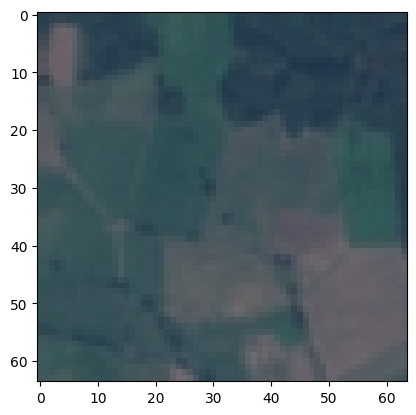

In [80]:
img = PIL.Image.open("dataset/Pasture/Pasture_1.jpg")
size = img.size
pyplot.imshow(img)

# Prediction

In [81]:
data = numpy.array(img.getdata()).reshape((size[0], size[1], 3)) / 255
inputs = torch.Tensor(data.transpose((2, 0, 1)).reshape((1, 3, 64, 64)))
y = unet(inputs)
pred = y.detach().numpy()[0]

## Probabilities of Classes

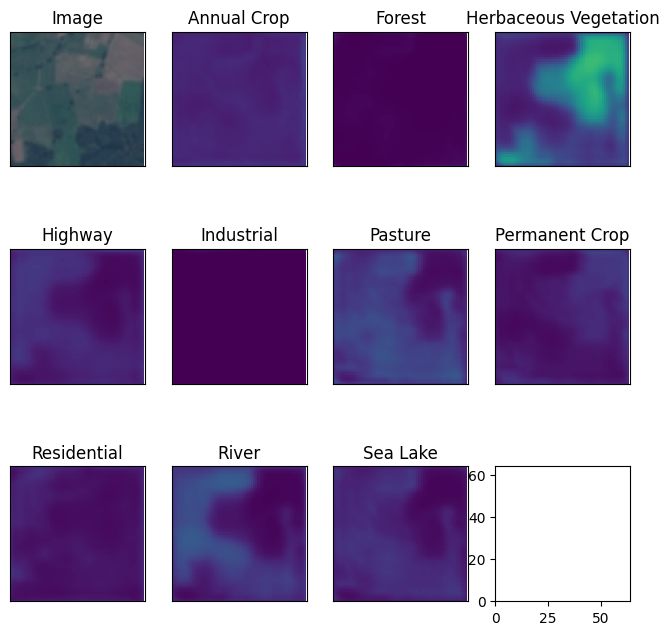

In [82]:
classes = {
    0: "Annual Crop",
    1: "Forest",
    2: "Herbaceous Vegetation",
    3: "Highway",
    4: "Industrial",
    5: "Pasture",
    6: "Permanent Crop",
    7: "Residential",
    8: "River",
    9: "Sea Lake",
}

fig, axs = pyplot.subplots(3, 4, squeeze=False, figsize=(8, 8), subplot_kw={"xlim": (0, 64), "ylim": (0, 64), "aspect": "equal"})

axs[0, 0].imshow(img)
axs[0, 0].set_title("Image")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

for i in range(10):
    ax = axs[(i + 1) // 4, (i + 1) % 4]
    segmented = pred[i]
    ax.matshow(segmented.transpose(), vmin=0, vmax=1)
    ax.set_title(classes[i])  # Add title for each subplot
    ax.set_xticks([])
    ax.set_yticks([])

pyplot.show()

## Segmented Image

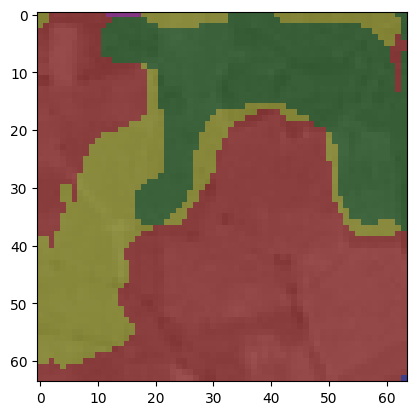

In [83]:
segmented = numpy.argmax(pred, axis=0)
pyplot.imshow(skimage.color.label2rgb(segmented, data))